In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
# reading the image with matplotlib
car = mpimg.imread('car.png')

In [5]:
# check the shape
car.shape

(1080, 1080, 4)

In [6]:
# last index represents the index for color space RGB

In [7]:
type(car)

numpy.ndarray

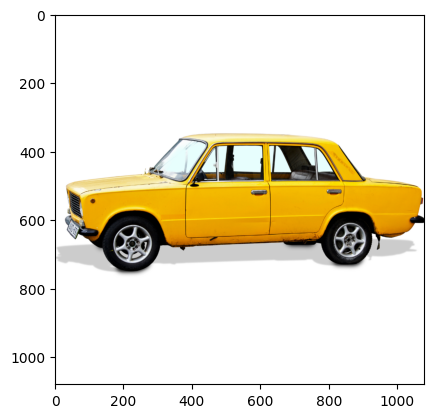

In [8]:
plt.imshow(car) # uses RGB color space

In [9]:
# reading with opencv
# use below code for colab only
# comment this whole cell if you are using this notebook in your PC
# from google.colab.patches import cv2_imshow 
# get the image
# image1 = cv2.imread('car.png')
# cv2_imshow(image1)  
# cv2.imshow("image", image1)

In [10]:
# reading with opencv
# uncomment and use below code for PC only

# # get the image
# image1 = cv2.imread('car.png')
# cv2.imshow(image1)  

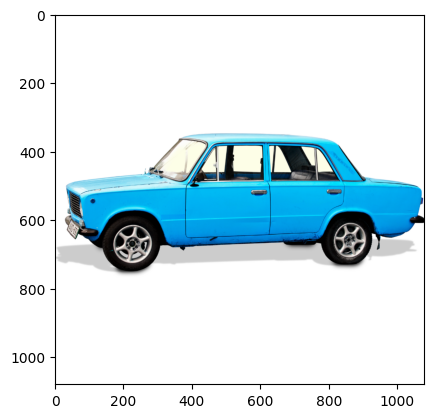

In [11]:
# reading with opencv and plotting using matplotlib -
image1 = cv2.imread('car.png')
plt.imshow(image1) # this will show BGR image. As openCV uses BGR colorspace

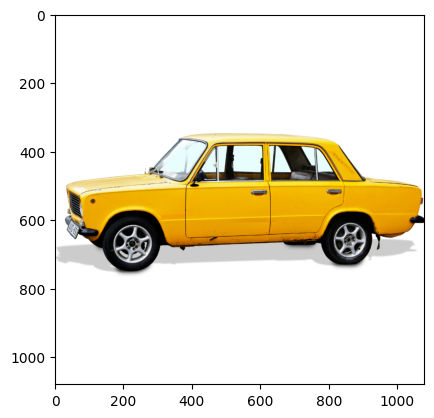

In [12]:
image2 = cv2.imread('car.png')
# changing BGR to RGB using below code
im2_normal = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(im2_normal)

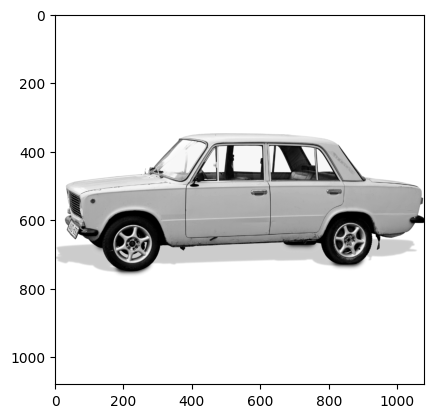

In [13]:
image3 = cv2.imread('car.png')
# converting image to grayscale
im3_gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
# using matplotlib and cmap = gray for grayscale reperesentation
plt.imshow(im3_gray, cmap = "gray")

In [14]:
# shape of grayscale image will be 2D 
im3_gray.shape 

(1080, 1080)

In [15]:
# check the max and min intensity of the gray scale image 
im3_gray.max(), im3_gray.min()

(255, 0)

In [16]:
# you can also save the gray scale image
cv2.imwrite("car_gray.jpeg", im3_gray)

True

# Let's understand the composition of a colored image 

In [17]:
def visualize_RGB_channels(imageArray=None, f_size=(10,7)):
    '''
    function to plot original and all channels seprately for 
    a colored image this helps you to understand basic composition 
    of an image.
    '''
    # split the colored image into its RGB components
    B, G, R = cv2.split(imageArray)

    # create a zero mat with shape of any channel
    # and data type, here B.shape and B.type is used-
    Z = np.zeros(B.shape, dtype=B.dtype)

    # intialize the subplots with figure size 
    fig, ax = plt.subplots(2,2,figsize=f_size)

    # set all axis off as its just an image plot
    [axi.set_axis_off() for axi in ax.ravel()]
    
    ax[0,0].set_title("original image")
    # merge RGB to show oringinal image
    ax[0,0].imshow(cv2.merge((R, G, B)))

    ax[0,1].set_title("Red channel image")
    # merge RZZ to show only Red channel
    ax[0,1].imshow(cv2.merge((R, Z, Z)))

    ax[1,0].set_title("Green channel image")
    # merge ZGZ to show only Green channel
    ax[1,0].imshow(cv2.merge((Z, G, Z)))

    ax[1,1].set_title("Blue channel image")
    # merge ZZB to show only Blue channel
    ax[1,1].imshow(cv2.merge((Z, Z, B)))

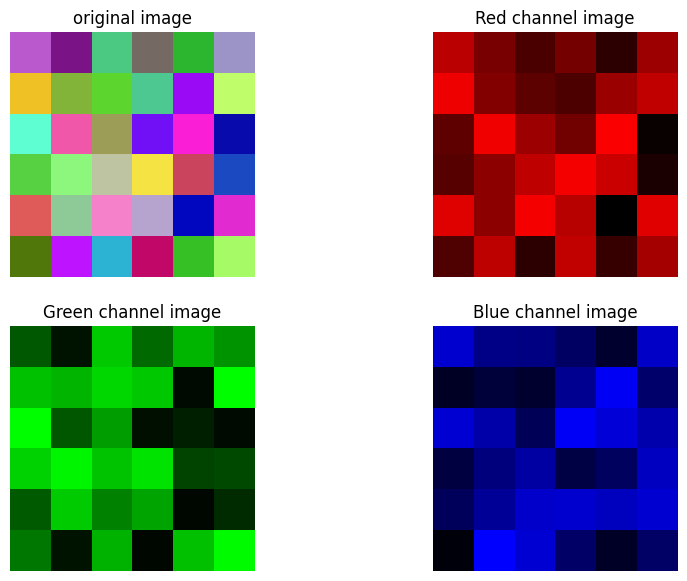

In [18]:
# randomly generate a 6*6*3 matrix showing and rgb image with 3 channels
random_colored_image = np.random.randint(1,255, 6*6*3).reshape(6,6,3)
visualize_RGB_channels(random_colored_image)

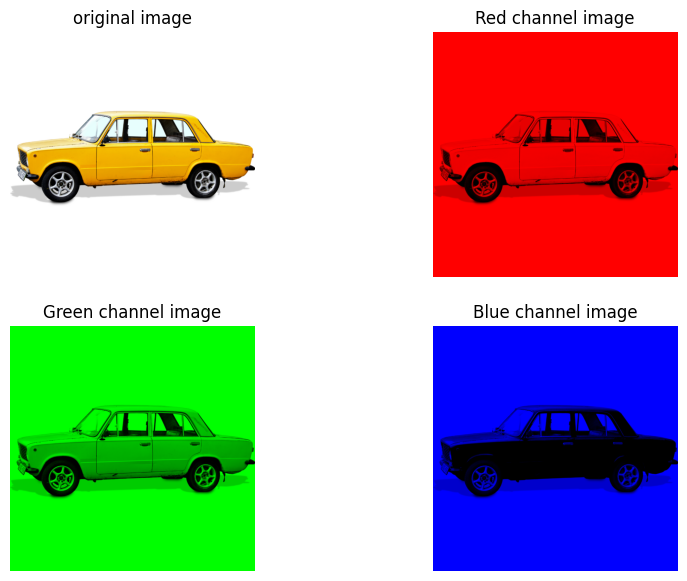

In [19]:
new_car = cv2.imread('car.png')
visualize_RGB_channels(new_car)

# Understanding basic filters like Sobel filter to detect edges

In [20]:
# sobal filter 
sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [21]:
# shape of sobel filter
sobel.shape

(3, 3)

In [22]:
# example array - 
example1 = [[0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255]]
example1 = np.array(example1)

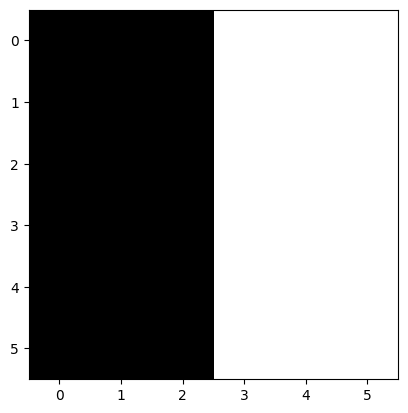

In [23]:
#lets plot the example array
plt.imshow(example1,cmap = "gray")

#Let's apply sobel filter and observe the results-
this is the fun part -

In [24]:
def find_edges(imgFilter=None, picture=None):
    '''
    this function applies filter on the given grayscale image
    and 
    it takes two inputs-
    imgFilter: here we supply basic horizontal and virtical filters eg. sobel
                sobel= [[ 1  0 -1]
                        [ 2  0 -2]
                        [ 1  0 -1]]
    sobel behaves as a vertical filter and sobel.T as horizontal filter
    
    picture: pass any colorLESS or grayscale
            picture in numpy array format
    '''
    # extract row and col of input picture
    p_row, p_col = picture.shape

    k = imgFilter.shape[0]

    temp = list() # temp list to store the final results

    # resultant rows and cols -
    final_cols = p_col-k+1
    final_rows = p_row-k+1

    # take vertically downward stride accross row by row
    for v_stride in range(final_rows):
        # take horizontally right stride accross col by col
        for h_stride in range(final_cols):
            temp.append(sum(sum(imgFilter * picture[v_stride: v_stride + k, \
                                                    h_stride: h_stride + k])))

    return np.array(temp).reshape(final_rows, final_cols)

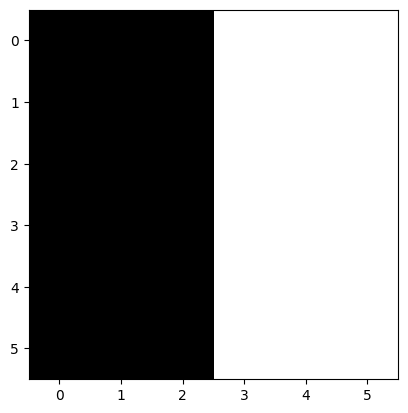

In [25]:
# again lets plot the example1 
plt.imshow(example1, cmap = "gray")

In [26]:
# result after applying find_edge function on example array
result = find_edges(sobel, example1)
result

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

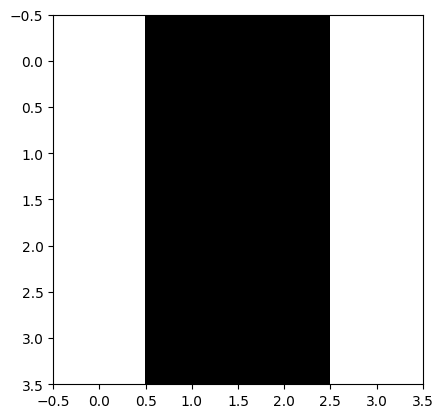

In [27]:
# lets visualize the results
plt.imshow(result, cmap="gray")
# this shows that an edge was present vertically at the center

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


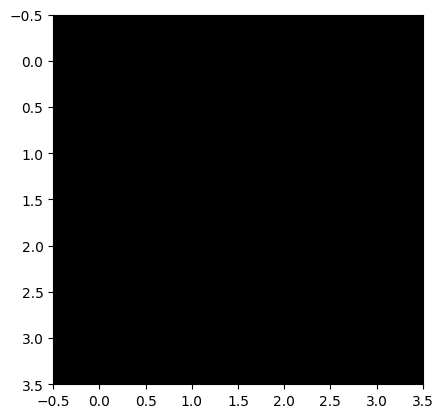

In [28]:
# lets apply transpose of sobel filter on our example array -
result = find_edges(sobel.T, example1)
print(result)

# this couldn't find any pattern as transpose of sobel will make it
# a horizontal line detector
plt.imshow(result, cmap="gray")

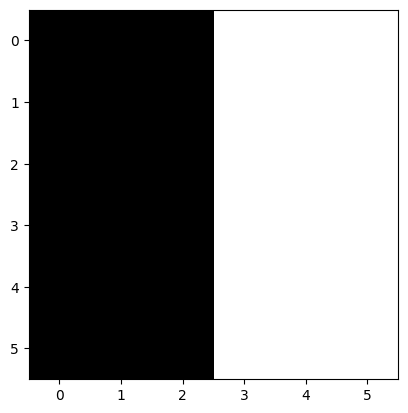

In [29]:
# now lets plot the transpose of example array
# to see the horizontal array 
plt.imshow(example1, cmap = "gray")

[[    0     0     0     0]
 [-1020 -1020 -1020 -1020]
 [-1020 -1020 -1020 -1020]
 [    0     0     0     0]]


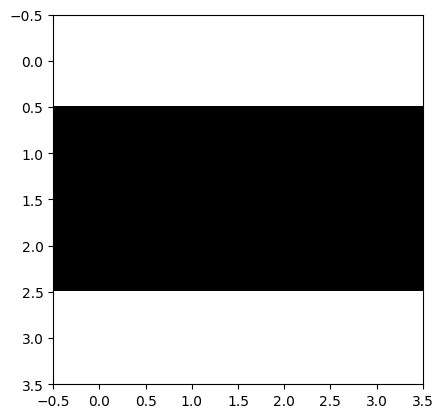

In [30]:
# lets apply transpose of sobel on above diagram
result = find_edges(sobel.T, example1.T)
print(result)

# the result shows the presence of horizonatal line in the image
plt.imshow(result, cmap="gray")

# Now applying our filter on the car image
carefully observe the results as our cars image contains both horizontal and vertical surfaces

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


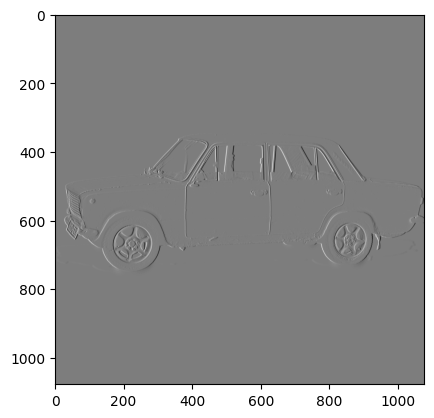

In [31]:
# applying vetrical sobel filter
result = find_edges(sobel, im3_gray)
print(result)
plt.imshow(result, cmap="gray")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


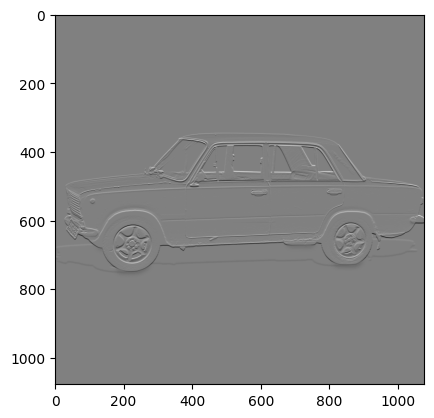

In [32]:
# applying horizontal sobel filter = sobel.T
result = find_edges(sobel.T, im3_gray)
print(result)
plt.imshow(result, cmap="gray")

# Now lets apply min max scaler on our images after finding edges

In [33]:
def min_max_scaler(matrix = None, scale=1):
    '''
    this function performs min max scaling on the given numpy array 
    by default scale = 1 >> range will be between 0 and 1
    for any other scale = N >> range will be between 0 and N
    '''
    shape = matrix.shape # get the shape of input matrix
    temp = matrix.ravel() # convert array into a 1-D array
    MAX = max(temp) # get the max val from temp
    MIN = min(temp) # get the max val from temp
    
    # scale value using min max formula defined here with lambda function
    # and map that function on our temp array
    result = list(map(lambda val: (val - MIN)/(MAX - MIN), temp))

    # convert the result into np array and then multiply with scale
    return np.array(result).reshape(shape)*scale

In [34]:
# do observe min and max values in the results -
print(f"\nour test picture in array form\n{example1}")

temp = find_edges(imgFilter=sobel, picture=example1)
print(f"\nafter applying find edges function\n{temp}")

temp = min_max_scaler(temp)
print(f"\nafter applying simple min max scaler\n{temp}")


our test picture in array form
[[  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]]

after applying find edges function
[[    0 -1020 -1020     0]
 [    0 -1020 -1020     0]
 [    0 -1020 -1020     0]
 [    0 -1020 -1020     0]]

after applying simple min max scaler
[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]


In [35]:
# do observe min and max values in the results -
print(f"\nour test picture in array form\n{example1}")

temp = find_edges(imgFilter=sobel, picture=example1)
print(f"\nafter applying find edges function\n{temp}")

temp = min_max_scaler(temp, scale=255)
print(f"\nafter applying min max scaler over a scale of 255\n{temp}")


our test picture in array form
[[  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]]

after applying find edges function
[[    0 -1020 -1020     0]
 [    0 -1020 -1020     0]
 [    0 -1020 -1020     0]
 [    0 -1020 -1020     0]]

after applying min max scaler over a scale of 255
[[255.   0.   0. 255.]
 [255.   0.   0. 255.]
 [255.   0.   0. 255.]
 [255.   0.   0. 255.]]


In [36]:
def plot_images(imFilter=None, imageFile=None, scale=1):
    result = find_edges(imFilter, imageFile)
    scaled_image = min_max_scaler(result, scale=scale)
    print("--"*30)
    plt.imshow(scaled_image, cmap="gray")

------------------------------------------------------------


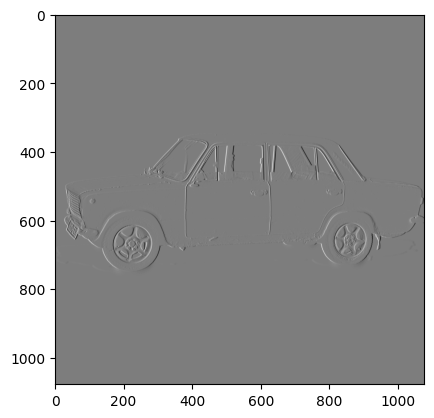

In [37]:
# applying vetrical sobel filter
plot_images(imFilter=sobel, imageFile=im3_gray, scale=255)

------------------------------------------------------------


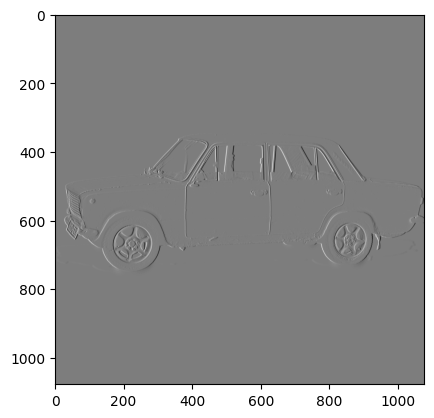

In [38]:
# applying horizontal sobel filter = sobel.T
plot_images(imFilter=sobel, imageFile=im3_gray, scale=255)

FURTHER EXLPLORATION BEGINS FROM HERE :)